In [1]:
#I am going to use the normal shortened, only 400 images, and balanaces out more

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm

In [3]:
DATADIR = "/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Training_Dataset"


In [4]:
Normal_Path = os.path.join(DATADIR, 'normalShortened')
AMD_Path = os.path.join(DATADIR,'AMD')

In [23]:
#Number in Normal
Normal_names = os.listdir(Normal_Path)
print(len(Normal_names))
print(Normal_names[:10])

420
['940_right.jpg', '859_left.jpg', '3_left.jpg', '734_left.jpg', '52_left.jpg', '1014_right.jpg', '951_left.jpg', '751_right.jpg', '798_right.jpg', '950_left.jpg']


In [22]:
#Number in Diabetic Retinopathy
A_names = os.listdir(AMD_Path)
print(len(A_names)) #More class weights here
print(A_names[:10])

358
['1919_right.jpg', '260_left.jpg', '53_left.jpg', '1841_left.jpg', '1840_left.jpg', 'A0081.jpg', 'A0042.jpg', 'A0056.jpg', '603_right.jpg', '1831_right.jpg']


In [7]:
import os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        DATADIR,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels, whilll change in transfer learning4
        class_mode='binary')

print(train_generator[0][0])

Found 9201 images belonging to 9 classes.
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [

In [9]:
img = AMD_Path+"/889_left.jpg"
img

'/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Training_Dataset/AMD/889_left.jpg'

In [10]:
img_array = cv2.imread(img ,cv2.IMREAD_UNCHANGED) 
#print(type(img_array))
# Specifying color for Leukoscognosis iterating
new_array = cv2.resize(img_array, (150, 150)) 

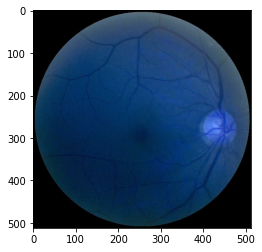

In [21]:
CATEGORIES = ["normalShortened","AMD"]

for category in CATEGORIES:  # creating for loop to iterate over categories
    path = os.path.join(DATADIR,category)  # create acessble path to dataset
    for img in os.listdir(path):  # For loop inside a for loop to iterate and specify conditions for specifc images
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)  # convert to array
        plt.imshow(img_array)  # graph it using matplotlive
        plt.show()  # display

        break  #Ending for loop
    break

In [12]:
print(img_array.shape)

(512, 512, 3)


In [30]:
IMG_SIZE = 150
CATEGORIES = ["normalShortened","AMD"]
def create_training_data():
    training_data = []
    for category in CATEGORIES:  
        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=Leukemia, 1=Healthy
        Normal_Path = os.path.join(DATADIR, 'normalShortened')
        Myopia_Path = os.path.join(DATADIR,'AMD')

        for img in os.listdir(path):  # iterate over each of the classes
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_UNCHANGED)  # Specifying color for Leukoscognosis iterating
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # training data, new numpyarray
            except Exception as e: 
                print(e)
                pass
    return training_data

In [31]:
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category) 
    print(path)
    print(os.listdir(path))

/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Training_Dataset/normalShortened
['940_right.jpg', '859_left.jpg', '3_left.jpg', '734_left.jpg', '52_left.jpg', '1014_right.jpg', '951_left.jpg', '751_right.jpg', '798_right.jpg', '950_left.jpg', '88_left.jpg', '810_left.jpg', '329_right.jpg', '228_left.jpg', '74_right.jpg', '679_right.jpg', '588_left.jpg', '589_left.jpg', '486_right.jpg', '165_right.jpg', '954_right.jpg', '146_left.jpg', '215_right.jpg', '147_left.jpg', '552_right.jpg', '287_right.jpg', '866_left.jpg', '144_right.jpg', '356_left.jpg', '366_right.jpg', '685_right.jpg', '150_right.jpg', '524_left.jpg', '25_left.jpg', '24_left.jpg', '293_right.jpg', '285_left.jpg', '456_right.jpg', '795_right.jpg', '276_right.jpg', '511_left.jpg', '83_left.jpg', '330_right.jpg', '82_left.jpg', '438_right.jpg', '58_left.jpg', '59_left.jpg', '362_left.jpg', '197_left.jpg', '9_left.jpg', '8_left.jpg', '559_left.jpg', '8_right.jpg', '

In [32]:
training_data = create_training_data()  

OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-spb0jh6_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [33]:
len(training_data)

777

In [34]:
import random

random.shuffle(training_data)
#Shuffling the data in order to ensure that the machine does not learn just Leukemia or White BLood cells. Allows for a variety in data.
#Shuffles the new training data created, is a mutable list, meaning it can be changed
for sample in training_data[:10]: #Printed out 10 samples
    print(sample[1])

0
0
1
1
1
1
0
1
0
1


In [35]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)   
y = np.array(y) 
X.shape, y.shape
#X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
#X.shape, y.shape

((777, 150, 150, 3), (777,))

In [36]:
y.sum()

357

In [37]:
X.shape[1:]

(150, 150, 3)

In [38]:
y.shape

(777,)

In [98]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.94):
            print("\nReached 94% accuracy so cancelling training!")
            self.model.stop_training = True


In [84]:
from tensorflow.keras.optimizers import Adam

In [216]:
#Runing this one
#callbacks = myCallback()

tf.compat.v1.random.set_random_seed(1234)
model = tf.keras.models.Sequential([
    
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolutio
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=X.shape[1:]), #input_shape=X.shape[1:]
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     #Fifth convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001,amsgrad=True),
              metrics=['accuracy'])

In [201]:
class_weight = {0: 1.,
                1: 10.}

In [202]:
X = X.astype('float32') 
print(X.dtype)

float32


In [217]:
history = model.fit(X, y, batch_size=32, epochs=100, validation_split=0.15, class_weight=class_weight)

Epoch 1/100
21/21 [==============================] - 15s 620ms/step - loss: 2.0458 - accuracy: 0.4810 - val_loss: 1.1992 - val_accuracy: 0.3932
Epoch 2/100
21/21 [==============================] - 14s 646ms/step - loss: 1.8092 - accuracy: 0.4691 - val_loss: 2.0579 - val_accuracy: 0.3932
Epoch 3/100
21/21 [==============================] - 14s 650ms/step - loss: 1.6456 - accuracy: 0.4952 - val_loss: 1.2582 - val_accuracy: 0.3932
Epoch 4/100
21/21 [==============================] - 13s 600ms/step - loss: 1.5604 - accuracy: 0.4749 - val_loss: 1.7250 - val_accuracy: 0.3932
Epoch 5/100
21/21 [==============================] - 13s 645ms/step - loss: 1.6143 - accuracy: 0.4458 - val_loss: 1.3949 - val_accuracy: 0.3932
Epoch 6/100
21/21 [==============================] - 13s 626ms/step - loss: 1.5094 - accuracy: 0.4534 - val_loss: 1.3545 - val_accuracy: 0.3932
Epoch 7/100
21/21 [==============================] - 13s 625ms/step - loss: 1.4298 - accuracy: 0.4797 - val_loss: 1.0601 - val_accuracy:

In [218]:
model.summary()   

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_13 (Batc (None, 150, 150, 3)       12        
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 74, 74, 64)        18496     
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 18, 18, 128)     

In [219]:
model.save('normalvamd')

INFO:tensorflow:Assets written to: normalvamd/assets


In [220]:
from tensorflow.keras.models import load_model
# load model4545
model = load_model('normalvamd')

<function matplotlib.pyplot.show(close=None, block=None)>

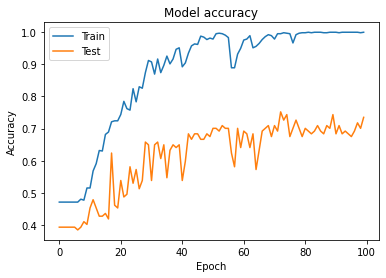

In [221]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import tqdm as tqdm
#Utlizing matplotlib to graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show

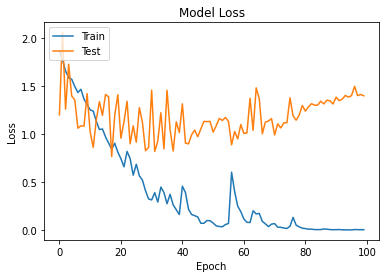

In [222]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import cv2
import tqdm as tqdm
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'],loc='upper left')
plt.show()

In [223]:
#Test
TEST = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset'
normal_test="/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/normalTest"
# dr_test = os.path.join(TEST, 'diabetesTest')
# normal_test = os.path.join(TEST, 'normalTest')
normal_test

'/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/normalTest'

In [224]:
a_test = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/AMDTest'
a_test


'/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/AMDTest'

In [225]:
print(len(os.listdir(normal_test)))
print(len(os.listdir(a_test))) # dr test

829
11


In [226]:
IMG_SIZE = 150
CATEGORIES = ["normalTest","AMDTest"]
def create_test_data():
    test_data = []
    for category in CATEGORIES:  
        path = os.path.join(TEST,category)  
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=Leukemia, 1=Healthy
        g_test = os.path.join(TEST, 'AMDTest')
        normal_test = os.path.join(TEST, 'normalTest')
        
#         for item in os.listdir(path):
#             if item.startswith('.') and not os.path.isfile(os.path.join(path, item)):
#                 path.remove(item)
                
        for img in os.listdir(path):  # iterate over each of the classes
            try:
                #print(os.path.join(path,img))
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_UNCHANGED) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                test_data.append([new_array, class_num])  # training data, new numpyarray
            except Exception as e: 
                print(e)
                print(os.path.join(path,img))
                pass
    return test_data

In [227]:
test_data = create_test_data()

OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-spb0jh6_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/normalTest/normalvdiabetes
OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-spb0jh6_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/normalTest/.DS_Store
OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-spb0jh6_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMa

In [228]:
Z = [] #testing data
t = [] #lables

for features,label in test_data:
    Z.append(features)
    t.append(label)
Z = np.array(Z)   
t = np.array(t) 
Z.shape, t.shape
#X.shape, y.shape 

((837, 150, 150, 3), (837,))

In [229]:
model.evaluate(Z,t)

27/27 [==============================] - 3s 121ms/step - loss: 1.3063 - accuracy: 0.7503


[1.3062790632247925, 0.7502986788749695]

(1, 148, 148, 32)
(1, 74, 74, 32)
(1, 74, 74, 64)
(1, 37, 37, 64)
(1, 37, 37, 128)


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide


(1, 18, 18, 128)
(1, 41472)
(1, 512)
(1, 256)
(1, 64)
(1, 1)


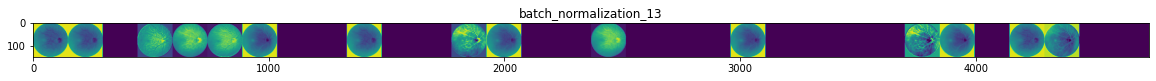

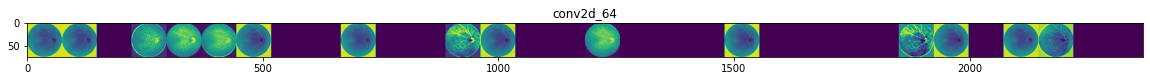

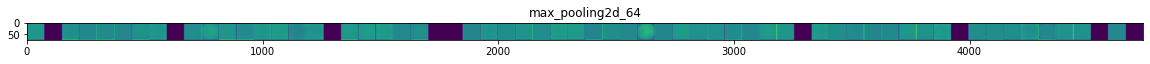

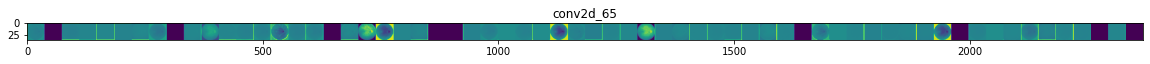

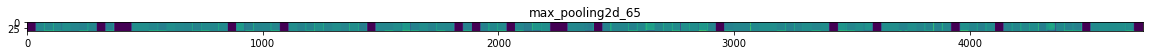

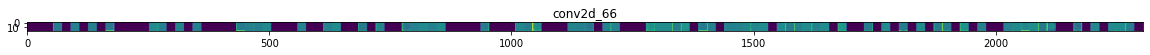

In [230]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
normal_file = [os.path.join(Normal_Path, f) for f in Normal_names]
a_file = [os.path.join(AMD_Path, f) for f in A_names]
img_path = random.choice(normal_file + a_file)


img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

m   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
m   = m.reshape((1,) + m.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
m /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(m)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      m = feature_map[0, :, :, i]
      m -= m.mean()
      m /= m.std ()
      m *=  64
      m += 128
      m  = np.clip(m, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = m # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

(1, 148, 148, 32)
(1, 74, 74, 32)
(1, 74, 74, 64)
(1, 37, 37, 64)
(1, 37, 37, 128)
(1, 18, 18, 128)


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


(1, 41472)
(1, 512)
(1, 256)
(1, 64)
(1, 1)


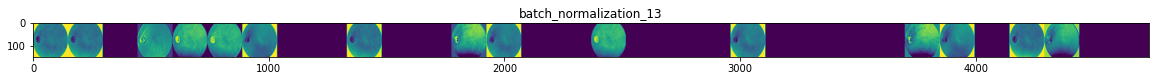

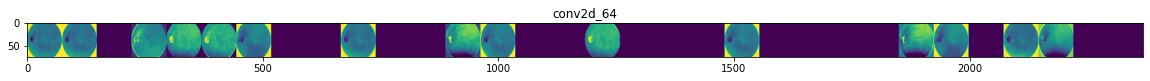

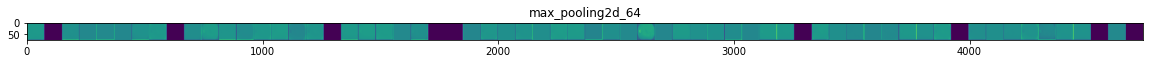

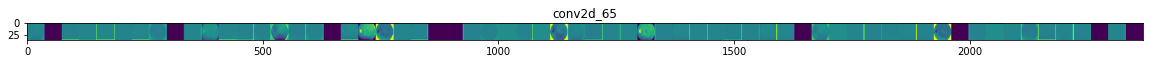

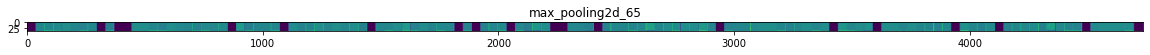

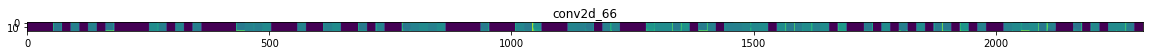

In [231]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

a_img= AMD_Path+ "/1111_left.jpg"


img = load_img(a_img, target_size=(150, 150))  # this is a PIL image

m   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
m   = m.reshape((1,) + m.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
m /= 255.0


successive_feature_maps = visualization_model.predict(m)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]


for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    

    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))


    for i in range(n_features):
      m = feature_map[0, :, :, i]
      m -= m.mean()
      m /= m.std ()
      m *=  64
      m += 128
      m  = np.clip(m, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = m # Tile each filter into a horizontal grid



    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis') 

In [232]:
#Diagnosie 
#MODIFY THE THINGY
import cv2
import tensorflow as tf
import numpy as np
n_test = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/normalTest'
#Check normal
CATEGORIES = ["Normal","AMD"]

def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # return the image with s 
 
#45A445$%$%image = image.astype(np.uint8)
prediction = model.predict([prepare(n_test+'/3433_left.jpg')])

print(prediction)  # will be a list in a list.



[[0.00024122]]


In [235]:
#Diagnosie 
#MODIFY THE THINGY
import cv2
import tensorflow as tf
import numpy as np
a_test = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/amdTest'
#Check normal
CATEGORIES = ["Normal","AMD"]

def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # return the image with s 
 
#45A445$%$%image = image.astype(np.uint8)
prediction = model.predict([prepare(a_test+'/889_right.jpg')])

print(prediction)  # will be a list in a list.



[[0.99999976]]


In [237]:
#Diagnosie 
#MODIFY THE THINGY
import cv2
import tensorflow as tf
import numpy as np
a_test = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/amdTest'
#Check normal
CATEGORIES = ["Normal","AMD"]

def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # return the image with s 
 
#45A445$%$%image = image.astype(np.uint8)
prediction = model.predict([prepare(a_test+'/A0087.jpg')])

print(prediction)  # will be a list in a list.



[[0.9999992]]


In [242]:
#Diagnosie 
#MODIFY THE THINGY
import cv2
import tensorflow as tf
import numpy as np
a_test = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/amdTest'
#Check normal
CATEGORIES = ["Normal","AMD"]

def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # return the image with s 
 
#45A445$%$%image = image.astype(np.uint8)
prediction = model.predict([prepare(a_test+'/A0088.jpg')])

print(prediction)  # will be a list in a list.



[[0.9957679]]


In [244]:
#Diagnosie 
#MODIFY THE THINGY
import cv2
import tensorflow as tf
import numpy as np
n_test = '/Users/swathikakarala/Desktop/Sirihaasa/Independent_Study_Machine_Learning/DatasetMachineLearning_EyeDisease/Testing_Dataset/normalTest'
#Check normal
CATEGORIES = ["Normal","AMD"]

def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # return the image with s 
 
#45A445$%$%image = image.astype(np.uint8)
prediction = model.predict([prepare(n_test+'/4208_left.jpg')])

print(prediction)  # will be a list in a list.



[[0.00018114]]


In [247]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('normalvamd') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('normalvamd.tflite', 'wb') as f:
    f.write(tflite_model)